In [1]:
!pip install tensorflow


In [2]:

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [3]:

data = pd.read_csv(r"C:\Users\ELCOT\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [10]:
data['TotalCharges'].fillna(data['TotalCharges'].median(),inplace=True)

<AxesSubplot:>

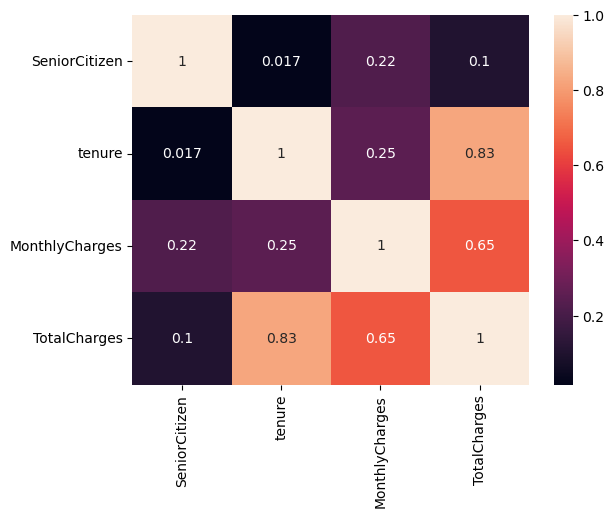

In [11]:
sns.heatmap(data.corr(),annot=True)

In [12]:
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

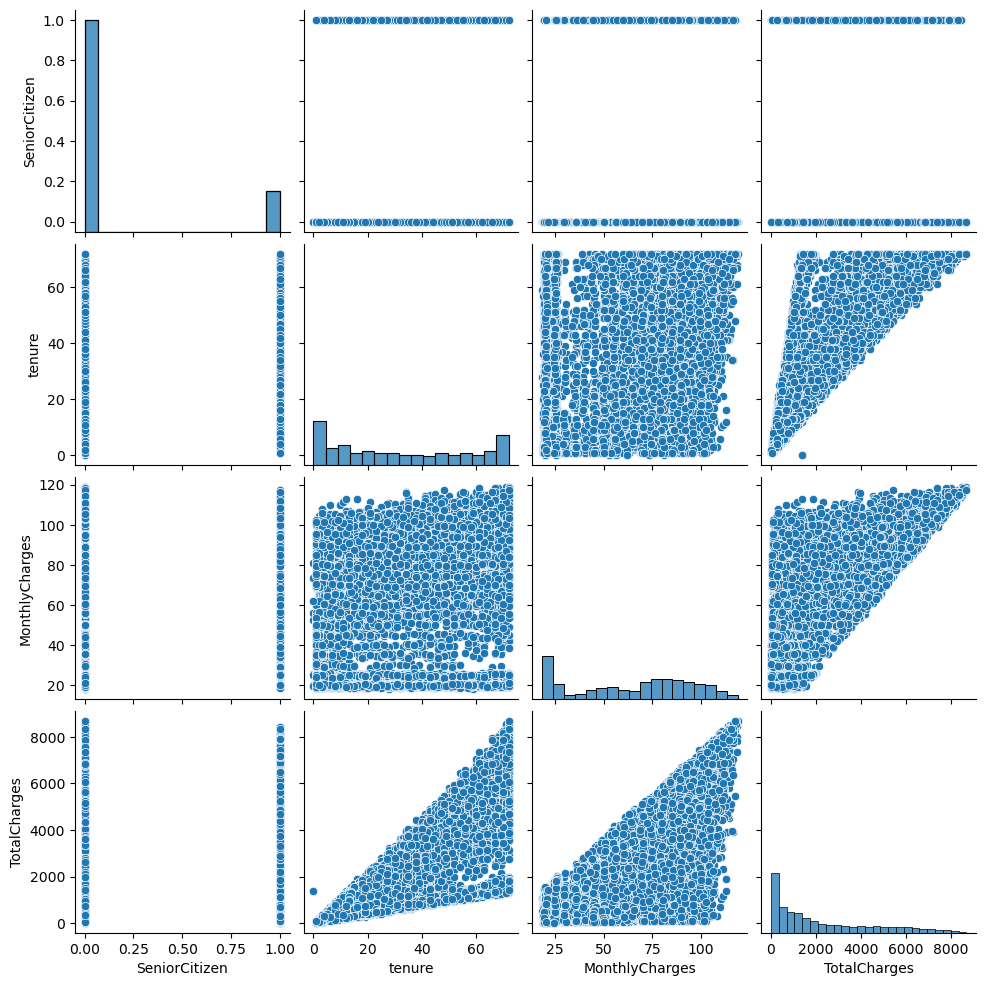

In [13]:
sns.pairplot(data=data,markers=["^","v"],palette="inferno")


In [14]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


In [15]:
data.shape

(7043, 21)

In [16]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [21]:

data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [22]:
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [24]:
data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [25]:
data['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [26]:
data['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
data['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [28]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [29]:
data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [31]:
data['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [32]:





data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:


data['gender']=le.fit_transform(data['gender'])
data['Partner']=le.fit_transform(data['Partner'])

In [35]:
data['Dependents']=le.fit_transform(data['Dependents'])
data['MultipleLines']=le.fit_transform(data['MultipleLines'])
data['PhoneService']=le.fit_transform(data['PhoneService'])
data['InternetService']=le.fit_transform(data['InternetService'])
data['OnlineSecurity']=le.fit_transform(data['OnlineSecurity'])
data['OnlineBackup']=le.fit_transform(data['OnlineBackup'])
data['DeviceProtection']=le.fit_transform(data['DeviceProtection'])
data['TechSupport']=le.fit_transform(data['TechSupport'])
data['StreamingTV']=le.fit_transform(data['StreamingTV'])
data['StreamingMovies']=le.fit_transform(data['StreamingMovies'])
data['Contract']=le.fit_transform(data['Contract'])
data['PaperlessBilling']=le.fit_transform(data['PaperlessBilling'])
data['PaymentMethod']=le.fit_transform(data['PaymentMethod'])
data['Churn']=le.fit_transform(data['Churn'])

In [36]:

data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [37]:
data.drop(columns='customerID', inplace=True)

In [38]:
x=data.iloc[:,:19].values


In [39]:
data['Churn'].value_counts() 

0    5174
1    1869
Name: Churn, dtype: int64

In [40]:
x.shape

(7043, 19)

In [41]:
y=data.iloc[:,19:20].values

In [42]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [43]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
a= one.fit_transform(x[:,6:7]).toarray()
b= one.fit_transform(x[:,7:8]).toarray()
c= one.fit_transform(x[:,8:9]).toarray()
d= one.fit_transform(x[:,9:10]).toarray()
e= one.fit_transform(x[:,10:11]).toarray()
f= one.fit_transform(x[:,11:12]).toarray()
g= one.fit_transform(x[:,12:13]).toarray()
h= one.fit_transform(x[:,13:14]).toarray()
i= one.fit_transform(x[:,14:15]).toarray()
j= one.fit_transform(x[:,16:17]).toarray()
x=np.delete(x,[6,7,8,9,10,11,12,13,14,16], axis=1)
x=np.concatenate((a,b,c,d,e,f,g,h,i,j,x), axis=1)

In [44]:
x.shape

(7043, 40)

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
smt = SMOTE()
x_resample, y_resample = smt.fit_resample(x,y)

In [47]:
x_resample.shape

(10348, 40)

In [48]:
y_resample

array([0, 0, 1, ..., 1, 1, 1])

In [49]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [50]:
x_resample.shape

(10348, 40)

In [51]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

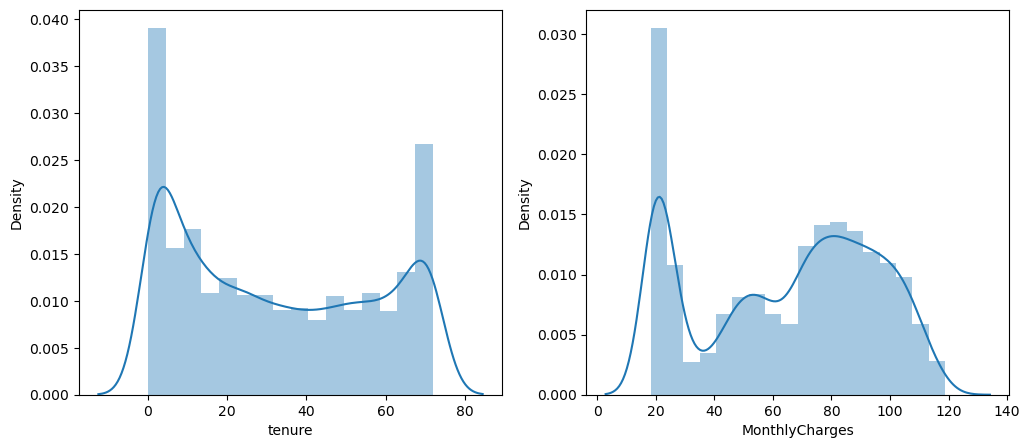

In [52]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data["tenure"])
plt.subplot(1,2,2)
sns.distplot(data["MonthlyCharges"])

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

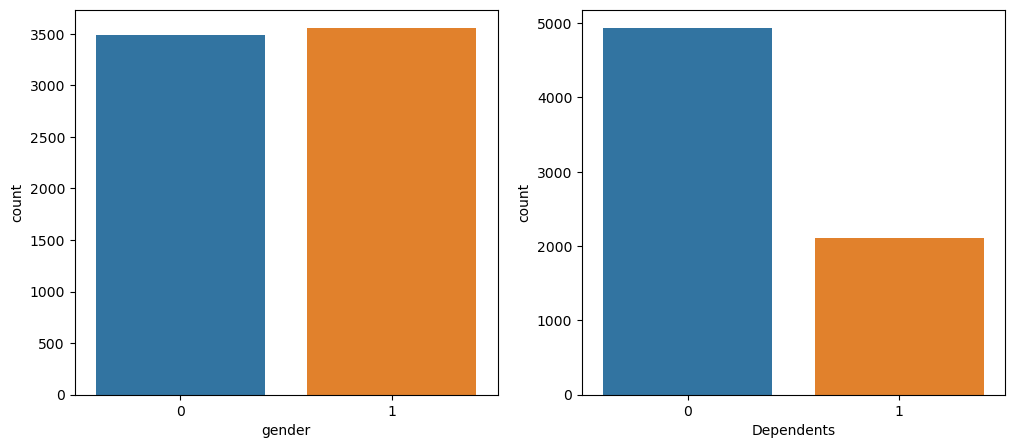

In [53]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data["gender"])
plt.subplot(1,2,2)
sns.countplot(data["Dependents"])

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

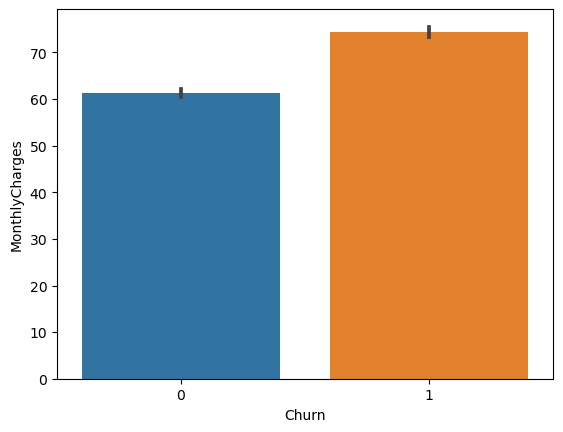

In [54]:
sns.barplot(x="Churn",y="MonthlyCharges",data=data)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size = 0.2, random_state=0)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [57]:
def logreg(x_train,x_test,y_train,y_test):
    lr = LogisticRegression(random_state=0)
    lr.fit(x_train,y_train)
    y_lr_tr = lr.predict(x_train)
    print(accuracy_score(y_lr_tr,y_train))
    yPred_lr = lr.predict(x_test)
    print(accuracy_score(yPred_lr,y_test))
    print("***Logistic Regression***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_lr))
    print("Classification Report")
    print(classification_report(y_test,yPred_lr))
    

In [58]:
logreg(x_train,x_test,y_train,y_test)

0.7742208262865427
0.7763285024154589
***Logistic Regression***
Confusion_Matrix
[[750 283]
 [180 857]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.73      0.76      1033
           1       0.75      0.83      0.79      1037

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



In [59]:

def decisionTree(x_train,x_test,y_train,y_test):
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
    dtc.fit(x_train,y_train)
    y_dt_tr = dtc.predict(x_train)
    print(accuracy_score(y_dt_tr,y_train))
    yPred_dt = dtc.predict(x_test)
    print(accuracy_score(yPred_dt,y_test))
    print("***Decision Tree***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_dt))
    print("Classification Report")
    print(classification_report(y_test,yPred_dt))

In [60]:
decisionTree(x_train,x_test,y_train,y_test)

0.9981879681082387
0.7434782608695653
***Decision Tree***
Confusion_Matrix
[[ 534  499]
 [  32 1005]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.52      0.67      1033
           1       0.67      0.97      0.79      1037

    accuracy                           0.74      2070
   macro avg       0.81      0.74      0.73      2070
weighted avg       0.81      0.74      0.73      2070



In [61]:
def RandomForest(x_train,x_test,y_train,y_test):
    rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
    rf.fit(x_train,y_train)
    y_rf_tr = rf.predict(x_train)
    print(accuracy_score(y_rf_tr,y_train))
    yPred_rf = rf.predict(x_test)
    print(accuracy_score(yPred_rf,y_test))
    print("***Random Forest***")
    print("Confusion Matrix")
    print(confusion_matrix(y_test,yPred_rf))
    print(classification_report(y_test,yPred_rf))
    

In [62]:
RandomForest(x_train,x_test,y_train,y_test)


0.9874365788837883
0.7304347826086957
***Random Forest***
Confusion Matrix
[[ 510  523]
 [  35 1002]]
              precision    recall  f1-score   support

           0       0.94      0.49      0.65      1033
           1       0.66      0.97      0.78      1037

    accuracy                           0.73      2070
   macro avg       0.80      0.73      0.71      2070
weighted avg       0.80      0.73      0.71      2070



In [63]:
def KNN(x_train,x_test,y_train,y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_knn_tr = knn.predict(x_train)
    print(accuracy_score(y_knn_tr,y_train))
    yPred_knn = knn.predict(x_test)
    print(accuracy_score(yPred_knn,y_test))
    print("***KNN***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_knn))
    print("Classification Report")
    print(classification_report(y_test,yPred_knn))

In [64]:

KNN(x_train,x_test,y_train,y_test)


C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8535878231456874


C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7913043478260869
***KNN***
Confusion_Matrix
[[716 317]
 [115 922]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1033
           1       0.74      0.89      0.81      1037

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070



In [65]:
def svm(x_train,x_test,y_train,y_test):
    svm = SVC(kernel = "linear")
    svm.fit(x_train,y_train)
    y_svm_tr = svm.predict(x_train)
    print(accuracy_score(y_svm_tr,y_train))
    yPred_svm = svm.predict(x_test)
    print("***Support Vector Machine***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,yPred_svm))
    print("Classification Report")
    print(classification_report(y_test,yPred_svm))

In [66]:
svm(x_train,x_test,y_train,y_test)

0.7622614158009181
***Support Vector Machine***
Confusion_Matrix
[[711 322]
 [193 844]]
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.69      0.73      1033
           1       0.72      0.81      0.77      1037

    accuracy                           0.75      2070
   macro avg       0.76      0.75      0.75      2070
weighted avg       0.76      0.75      0.75      2070



In [67]:
!pip install keras


In [67]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [68]:
classifier = Sequential()

In [69]:

classifier.add(Dense(units=30,activation='relu', input_dim=40))

In [70]:
classifier.add(Dense(units=30, activation='relu'))

In [71]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [72]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [74]:
model_history = classifier.fit(x_train,y_train,batch_size=10,validation_split=0.33,epochs=200)


Epoch 1/200
555/555 [==============================] - 13s 14ms/step - loss: 0.4984 - accuracy: 0.7544 - val_loss: 0.4703 - val_accuracy: 0.7679
Epoch 2/200
555/555 [==============================] - 7s 12ms/step - loss: 0.4561 - accuracy: 0.7847 - val_loss: 0.4609 - val_accuracy: 0.7811
Epoch 3/200
555/555 [==============================] - 5s 9ms/step - loss: 0.4422 - accuracy: 0.7944 - val_loss: 0.4531 - val_accuracy: 0.7840
Epoch 4/200
555/555 [==============================] - 5s 9ms/step - loss: 0.4322 - accuracy: 0.7984 - val_loss: 0.4519 - val_accuracy: 0.7910
Epoch 5/200
555/555 [==============================] - 5s 9ms/step - loss: 0.4232 - accuracy: 0.8036 - val_loss: 0.4436 - val_accuracy: 0.7936
Epoch 6/200
555/555 [==============================] - 5s 9ms/step - loss: 0.4144 - accuracy: 0.8114 - val_loss: 0.4415 - val_accuracy: 0.7859
Epoch 7/200
555/555 [==============================] - 5s 9ms/step - loss: 0.4074 - accuracy: 0.8112 - val_loss: 0.4429 - val_accuracy: 0.7

Epoch 58/200
555/555 [==============================] - 5s 9ms/step - loss: 0.2354 - accuracy: 0.8958 - val_loss: 0.4952 - val_accuracy: 0.8078
Epoch 59/200
555/555 [==============================] - 5s 8ms/step - loss: 0.2357 - accuracy: 0.8960 - val_loss: 0.4900 - val_accuracy: 0.8042
Epoch 60/200
555/555 [==============================] - 5s 8ms/step - loss: 0.2316 - accuracy: 0.8987 - val_loss: 0.5097 - val_accuracy: 0.8173
Epoch 61/200
555/555 [==============================] - 5s 9ms/step - loss: 0.2322 - accuracy: 0.8979 - val_loss: 0.5035 - val_accuracy: 0.8111
Epoch 62/200
555/555 [==============================] - 5s 9ms/step - loss: 0.2270 - accuracy: 0.9041 - val_loss: 0.5095 - val_accuracy: 0.8097
Epoch 63/200
555/555 [==============================] - 5s 8ms/step - loss: 0.2305 - accuracy: 0.8990 - val_loss: 0.5270 - val_accuracy: 0.8020
Epoch 64/200
555/555 [==============================] - 5s 9ms/step - loss: 0.2271 - accuracy: 0.9010 - val_loss: 0.5123 - val_accuracy:

Epoch 115/200
555/555 [==============================] - 7s 12ms/step - loss: 0.1803 - accuracy: 0.9235 - val_loss: 0.6329 - val_accuracy: 0.8067
Epoch 116/200
555/555 [==============================] - 5s 9ms/step - loss: 0.1817 - accuracy: 0.9241 - val_loss: 0.6530 - val_accuracy: 0.8001
Epoch 117/200
555/555 [==============================] - 5s 9ms/step - loss: 0.1781 - accuracy: 0.9225 - val_loss: 0.6599 - val_accuracy: 0.8042
Epoch 118/200
555/555 [==============================] - 5s 9ms/step - loss: 0.1784 - accuracy: 0.9225 - val_loss: 0.6242 - val_accuracy: 0.8119
Epoch 119/200
555/555 [==============================] - 5s 8ms/step - loss: 0.1808 - accuracy: 0.9230 - val_loss: 0.6546 - val_accuracy: 0.8115
Epoch 120/200
555/555 [==============================] - 5s 9ms/step - loss: 0.1807 - accuracy: 0.9230 - val_loss: 0.6582 - val_accuracy: 0.7969
Epoch 121/200
555/555 [==============================] - 5s 9ms/step - loss: 0.1728 - accuracy: 0.9219 - val_loss: 0.6573 - val_a

In [73]:
ann_pred = classifier.predict(x_test)
ann_pred = (ann_pred>0.5)
ann_pred

65/65 [==============================] - 5s 9ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [74]:
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("confusion Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))

0.49420289855072463
***ANN Model***
confusion Matrix
[[1021   12]
 [1035    2]]
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.99      0.66      1033
           1       0.14      0.00      0.00      1037

    accuracy                           0.49      2070
   macro avg       0.32      0.50      0.33      2070
weighted avg       0.32      0.49      0.33      2070



In [75]:
x.shape

(7043, 40)

In [76]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
print("predicting on random input")
lr_pred_own = lr.predict(sc.transform([[0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",lr_pred_own)

predicting on random input
output is: [0]


In [77]:
dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
dtc.fit(x_train,y_train)
print("Predicting on Random input")
dtc_pred_own = dtc.predict(sc.transform([[1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",dtc_pred_own)

Predicting on Random input
output is: [1]


In [78]:
rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
rf.fit(x_train,y_train)
print("Predicting on random input")
rf_pred_own = rf.predict(sc.transform([[0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",rf_pred_own)


Predicting on random input
output is:  [1]


In [79]:
svc = SVC(kernel = "linear")
svc.fit(x_train,y_train)
print("Predicting on the Random input")
svm_pred_own = svc.predict(sc.transform([[0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",svm_pred_own)

Predicting on the Random input
output is: [0]


In [80]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Predicting on random input")
knn_pred_own = knn.predict(sc.transform([[0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",knn_pred_own)

Predicting on random input
output is: [0]


C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [81]:
print("Predict on Random input")
ann_pred_own = classifier.predict(sc.transform([[0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,3245,4567]]))
print("output is:",ann_pred_own)

Predict on Random input
1/1 [==============================] - 0s 132ms/step
output is: [[1.5764177e-10]]


In [82]:
def compareModel(x_train,x_test,y_train,y_test):
    logreg(x_train,x_test,y_train,y_test)
    print('-'*100)
    decisionTree(x_train,x_test,y_train,y_test)
    print('-'*100)
    RandomForest(x_train,x_test,y_train,y_test)
    print('-'*100)
    svm(x_train,x_test,y_train,y_test)
    print('-'*100)
    KNN(x_train,x_test,y_train,y_test)
    print('-'*100)

In [83]:
compareModel(x_train,x_test,y_train,y_test)

0.7742208262865427
0.7763285024154589
***Logistic Regression***
Confusion_Matrix
[[750 283]
 [180 857]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.73      0.76      1033
           1       0.75      0.83      0.79      1037

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070

----------------------------------------------------------------------------------------------------
0.9981879681082387
0.7434782608695653
***Decision Tree***
Confusion_Matrix
[[ 534  499]
 [  32 1005]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.52      0.67      1033
           1       0.67      0.97      0.79      1037

    accuracy                           0.74      2070
   macro avg       0.81      0.74      0.73      2070
weighted avg       0.81      0.74      0.73      2

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8535878231456874


C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7913043478260869
***KNN***
Confusion_Matrix
[[716 317]
 [115 922]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1033
           1       0.74      0.89      0.81      1037

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070

----------------------------------------------------------------------------------------------------


In [84]:
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confusion Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))

0.49420289855072463
***ANN Model***
Confusion Matrix
[[1021   12]
 [1035    2]]
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.99      0.66      1033
           1       0.14      0.00      0.00      1037

    accuracy                           0.49      2070
   macro avg       0.32      0.50      0.33      2070
weighted avg       0.32      0.49      0.33      2070



In [96]:
y_rf = model.predict(x_train)
print(accuracy_score(y_rf,y_train))
yPred_rfcv = model.predict(x_test)
print(accuracy_score(yPred_rcfv,y_test))
print("***Random Forest after Hyperparameter tuning***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,yPred_rfcv))
print("Classification Report")
print(classification_report(y_test,yPred_rfcv))
print("predicting on random input")
rfcv_pred_own = Model.predict(sc.transform([[0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",rfcv_pred_own)                                            

AttributeError: module 'pyexpat.model' has no attribute 'predict'

In [94]:
from keras.models import Model

In [90]:
classifier.save("telecom_churn.hs")

INFO:tensorflow:Assets written to: telecom_churn.hs\assets


INFO:tensorflow:Assets written to: telecom_churn.hs\assets


In [91]:
from flask import Flask, render_template, request
import keras
from keras.models import load_model

In [92]:
app = Flask(__name__)
model = load_model("telecom_churn.hs")

In [2]:
@app.route('/')
def home():
    return render_template('home.html')

NameError: name 'app' is not defined

In [ ]:
@app.route('/')
def helloworld():
    return render_template("base.html")
@app.route('/assesment')
def prediction():
    return render_template("index.html")
@app.route('/predict', methods = ['POST'])
def admin():
    a= request.form["gender"]
    if (a =='f'):
        a=0
    if (a == 'm'):
        a=1
    b= request.form["srcitizen"]
    if (b == 'n'):
        b=0
    if (b == 'y'):
        b=1
    c= request.form["partner"]
    if (c == 'n'):
        c=0
    if (c == 'y'):
        c=1
    d= request.form["dependents"]
    if (d == 'y'):
        d=1
    e= request.form["tenure"]
    f= request.form["phservices"]
    if (f == 'n'):
        f=0
    if (f == 'y'):
        f=1
    g= request.form["multi"] 
    if (g == 'n'):
        g=0
    if (g == 'n'):
        g1,g2,g3=1,0,0
    if (g == 'nps'):
        g1,g2,g3=0,1,0
    if (g == 'y'):
        g1,g2,g3=0,0,1
    h= request.form["is"]
    if (h == 'dsl'):
        h1,h2,h3=1,0,0
    if (h == 'fo'):
        h1,h2,h3=0,1,0
    if (h == 'n'):
        h1,h2,h3=0,0,1
    i= request.form["os"]
    if (i == 'n'):
        i1,i2,i3=1,0,0
    if (i == 'nis'):
        i1,i2,i3=0,1,0
    if (i == 'y'):
        i1,i2,i3=0,0,1
    j= request.form["ob"]
    if (j == 'n'):
        j1,j2,j3=1,0,0
    if (j == 'nis'):
        j1,j2,j3=0,1,0
    if (j == 'y'):
        j1,j2,j3=0,0,1
    k= request.form["dp"]
    if (k == 'n'):
        k1,k2,k3=1,0,0
    if (k == 'nis'):
        k1,k2,k3=0,1,0
    if (k == 'y'):
        k1,k2,k3=0,0,1
    l= request.form["ts"]
    if (l == 'n'):
        l1,l2,l3=1,0,0
    if (l == 'nis'):
        l1,l2,l3=0,1,0
    if (l == 'y'):
        l1,l2,l3=0,0,1
    m= request.form["stv"]
    if (m == 'n'):
        m1,m2,m3=1,0,0
    if (m == 'nis'):
        m1,m2,m3=0,1,0
    if (m == 'y'):
        m1,m2,m3=0,0,1
    n= request.form["smv"]
    if (n == 'n'):
        n1,n2,n3=1,0,0
    if (n == 'nis'):
        n1,n2,n3=0,1,0
    if (n == 'y'):
        n1,n2,n3=0,0,1
    o= request.form["contract"]
    if (o == 'mtm'):
        o1,o2,o3=1,0,0
    if (o == 'oyr'):
        o1,o2,o3=0,1,0
    if (o == 'tyrs'):
        o1,o2,o3=0,0,1
    p= request.form["pmt"]
    if (p == 'ec'):
        p1,p2,p3,p4=1,0,0,0
    if (p == 'mail'):
        p1,p2,p3,p4=0,1,0,0
    if (p == 'bt'):
        p1,p2,p3,p4=0,0,1,0
    if (p == 'cc'):
        p1,p2,p3,p4=0,0,0,1
    q= request.form["plb"]
    if (q== 'n'):
        q=0
    if (q == 'y'):
        q=1
    r= request.form["mcharges"]
    s= request.form["tcharges"]
     
    t=[[int(g1),int(g2),int(g3),int(h1),int(h2),int(h3),int(i1),int(i2),int(i3),int(j1)]]
    print(t)
    x = model.predict(t)
    print(x[0])
    if (x[[0]] <=0.5):
        y = "No"
        return render_template("predno.html", z = y)
    if (x[[0]] >= 0.5):
        y="Yes"
        return render_template("predyes.html", z = y)
    
    

In [95]:

print(x_train.shape)

(8278, 40)


In [ ]:






print(x_test.shape)

In [ ]:


print(y_train.shape)

In [ ]:
print(y_test.shape)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
x_train

In [ ]:
x_test

# Model Building

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

In [ ]:
svm_pred=svm.predict(x_test)
svm_pred

In [ ]:
from sklearn.metrics import accuracy_score
svm_acc=accuracy_score(svm_pred,y_test)
svm_acc

In [ ]:
from sklearn.metrics import confusion_matrix
svm_cm=confusion_matrix(svm_pred,y_test)
svm_cm

In [ ]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,svm_pred)
roc_auc=metrics.auc(fpr,tpr)

In [ ]:
import matplotlib.pyplot as plt
plt.title("ROC_AUC CURVE for SVM")
plt.plot(fpr,tpr,'g',label='auc=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('tpr')
plt.legend(loc='lower right')

In [ ]:
import pickle
pickle.dump(svm,open('churnnew.pkl','wb'))